# LSTM Model

In [2]:
from datetime import datetime
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [6]:
df = pd.read_csv('BTC.csv')
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %', 'Price'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df = df.sort_values('Date')
df.index = np.arange(0, len(df))
df

,Date,ClosingPrice
0,2017-12-01,0.108615
1,2017-12-02,0.109127
2,2017-12-03,0.112462
3,2017-12-04,0.116239
4,2017-12-05,0.116671
...,...,...
1943,2023-03-28,0.272622
1944,2023-03-29,0.283504
1945,2023-03-30,0.280295
1946,2023-03-31,0.284737


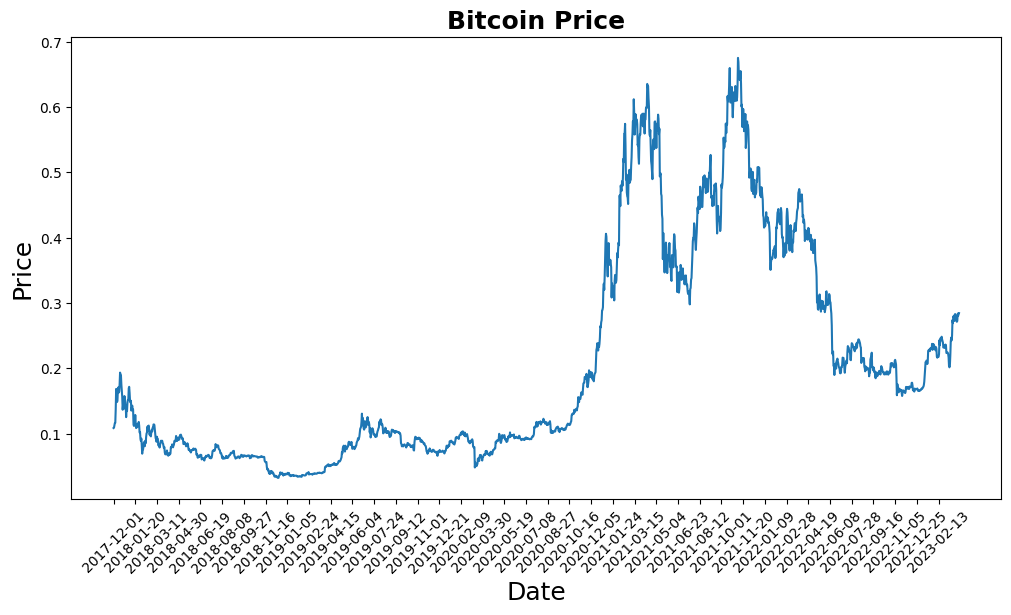

In [7]:
# Illustrated diagram
price = df[['ClosingPrice']]
plt.figure(figsize = (12,6))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

In [8]:
# Preprocessing and dividing the dataset into train/test
price = np.array(price)
price

array([[0.108615],
       [0.109127],
       [0.112462],
       ...,
       [0.280295],
       [0.284737],
       [0.284561]])

In [9]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [10]:
train, test = price[0:train_size,:], price[train_size:len(df),:]
print(len(train), len(test))

1558 390


In [11]:
# Convert the array of values to the matrix of dataset
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [12]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1554, 3)
(1554,)
(386, 3)
(386,)


In [13]:
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
trainX.shape
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
testX.shape

(386, 3, 1)

In [14]:
# Define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Fit model
model.fit(trainX, trainY, epochs=300, verbose=1)

Epoch 1/300
49/49 [==============================] - 5s 7ms/step - loss: 0.0350
Epoch 2/300
49/49 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 3/300
49/49 [==============================] - 0s 5ms/step - loss: 3.4300e-04
Epoch 4/300
49/49 [==============================] - 0s 4ms/step - loss: 2.6292e-04
Epoch 5/300
49/49 [==============================] - 0s 4ms/step - loss: 2.2800e-04
Epoch 6/300
49/49 [==============================] - 0s 6ms/step - loss: 2.2339e-04
Epoch 7/300
49/49 [==============================] - 0s 4ms/step - loss: 2.1324e-04
Epoch 8/300
49/49 [==============================] - 0s 4ms/step - loss: 2.1766e-04
Epoch 9/300
49/49 [==============================] - 0s 5ms/step - loss: 2.1432e-04
Epoch 10/300
49/49 [==============================] - 0s 5ms/step - loss: 2.1403e-04
Epoch 11/300
49/49 [==============================] - 0s 7ms/step - loss: 2.1273e-04
Epoch 12/300
49/49 [==============================] - 0s 5ms/step - loss: 2.1872e-

49/49 [==============================] - 0s 5ms/step - loss: 1.7552e-04
Epoch 98/300
49/49 [==============================] - 0s 6ms/step - loss: 1.7615e-04
Epoch 99/300
49/49 [==============================] - 0s 5ms/step - loss: 1.9157e-04
Epoch 100/300
49/49 [==============================] - 0s 4ms/step - loss: 1.7991e-04
Epoch 101/300
49/49 [==============================] - 0s 4ms/step - loss: 1.7041e-04
Epoch 102/300
49/49 [==============================] - 0s 7ms/step - loss: 1.5798e-04
Epoch 103/300
49/49 [==============================] - 0s 5ms/step - loss: 1.6181e-04
Epoch 104/300
49/49 [==============================] - 0s 5ms/step - loss: 1.6927e-04
Epoch 105/300
49/49 [==============================] - 0s 4ms/step - loss: 1.5489e-04
Epoch 106/300
49/49 [==============================] - 0s 5ms/step - loss: 1.5197e-04
Epoch 107/300
49/49 [==============================] - 0s 7ms/step - loss: 1.6881e-04
Epoch 108/300
49/49 [==============================] - 0s 5ms/step - l

49/49 [==============================] - 0s 4ms/step - loss: 1.3422e-04
Epoch 193/300
49/49 [==============================] - 0s 4ms/step - loss: 1.2616e-04
Epoch 194/300
49/49 [==============================] - 0s 4ms/step - loss: 1.2457e-04
Epoch 195/300
49/49 [==============================] - 0s 7ms/step - loss: 1.2124e-04
Epoch 196/300
49/49 [==============================] - 0s 4ms/step - loss: 1.1940e-04
Epoch 197/300
49/49 [==============================] - 0s 4ms/step - loss: 1.2070e-04
Epoch 198/300
49/49 [==============================] - 0s 4ms/step - loss: 1.1955e-04
Epoch 199/300
49/49 [==============================] - 0s 4ms/step - loss: 1.2081e-04
Epoch 200/300
49/49 [==============================] - 0s 7ms/step - loss: 1.2236e-04
Epoch 201/300
49/49 [==============================] - 0s 4ms/step - loss: 1.3004e-04
Epoch 202/300
49/49 [==============================] - 0s 4ms/step - loss: 1.1739e-04
Epoch 203/300
49/49 [==============================] - 0s 4ms/step -

49/49 [==============================] - 0s 4ms/step - loss: 1.1855e-04
Epoch 288/300
49/49 [==============================] - 0s 4ms/step - loss: 1.2164e-04
Epoch 289/300
49/49 [==============================] - 0s 4ms/step - loss: 1.2808e-04
Epoch 290/300
49/49 [==============================] - 0s 4ms/step - loss: 1.1133e-04
Epoch 291/300
49/49 [==============================] - 0s 7ms/step - loss: 1.1862e-04
Epoch 292/300
49/49 [==============================] - 0s 5ms/step - loss: 1.2483e-04
Epoch 293/300
49/49 [==============================] - 0s 4ms/step - loss: 1.1907e-04
Epoch 294/300
49/49 [==============================] - 0s 4ms/step - loss: 1.2928e-04
Epoch 295/300
49/49 [==============================] - 0s 4ms/step - loss: 1.2082e-04
Epoch 296/300
49/49 [==============================] - 0s 7ms/step - loss: 1.1410e-04
Epoch 297/300
49/49 [==============================] - 0s 4ms/step - loss: 1.3298e-04
Epoch 298/300
49/49 [==============================] - 0s 5ms/step -

In [15]:
LSTM_predict= model.predict(testX)
LSTM_predict.reshape(-1,1)

13/13 [==============================] - 1s 4ms/step


array([[0.39777982],
       [0.38778454],
       [0.38826817],
       [0.37968507],
       [0.3947615 ],
       [0.39399695],
       [0.40937442],
       [0.40985397],
       [0.4168185 ],
       [0.42208242],
       [0.41370645],
       [0.41014117],
       [0.42241332],
       [0.42894918],
       [0.43931422],
       [0.44323114],
       [0.44518128],
       [0.4666465 ],
       [0.47098187],
       [0.47427237],
       [0.47085926],
       [0.45575285],
       [0.46172908],
       [0.45845988],
       [0.46334997],
       [0.4661863 ],
       [0.45558786],
       [0.43272913],
       [0.43325752],
       [0.42366466],
       [0.42672262],
       [0.42190763],
       [0.39754555],
       [0.39963624],
       [0.41052896],
       [0.40096492],
       [0.40476626],
       [0.4042346 ],
       [0.39783728],
       [0.40687996],
       [0.41468167],
       [0.41393885],
       [0.40568358],
       [0.39781576],
       [0.39448476],
       [0.3947661 ],
       [0.40346977],
       [0.384

In [16]:
testY = testY.reshape(-1,1)
testY.shape

(386, 1)

In [17]:
date = pd.to_datetime(df.Date)
date = date[(len(date)-len(testY)):]
date

1562   2022-03-12
1563   2022-03-13
1564   2022-03-14
1565   2022-03-15
1566   2022-03-16
          ...    
1943   2023-03-28
1944   2023-03-29
1945   2023-03-30
1946   2023-03-31
1947   2023-04-01
Name: Date, Length: 386, dtype: datetime64[ns]

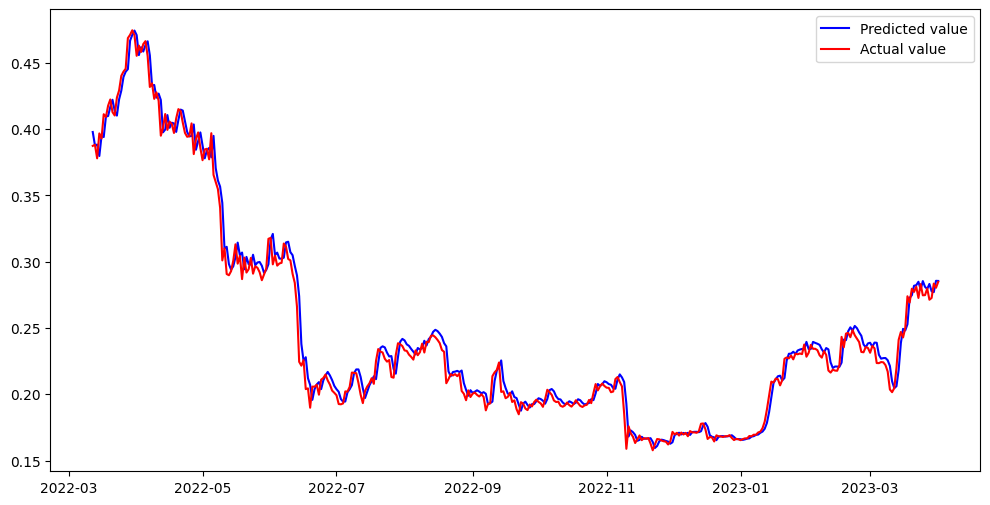

In [18]:
fig= plt.figure(figsize=(12,6))
plt.plot(date,LSTM_predict,color='blue', label='Predicted value')
plt.plot(date,testY,color='red', label='Actual value')
plt.legend()
plt.show()

In [19]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [20]:
#MAPE
mean_absolute_percentage_error(testY, LSTM_predict)

2.488472426585557

In [21]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(testY, LSTM_predict)
RMSE = math.sqrt(MSE)
print(RMSE)

0.008911169578514415
